In [1]:
from scipy.interpolate import interp1d
from spec_id import Stack_posteriors, Get_flux, Mean_stack, Median_stack
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from glob import glob
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

In [11]:
def Gauss_dist(x, mu, sigma):
    G = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    C = np.trapz(G, x)
    G /= C
    return G

def Bootstrap_errors_stack(dist_grid,x,its=1000):
    b_grid = np.zeros([its,len(x)])
    IDs = np.arange(len(dist_grid))
    
    for i in range(its):
        IDn = np.random.choice(IDs,len(IDs),replace=True)
        Pos = Stack_posteriors(dist_grid[IDn],x)
        b_grid[i] = Pos
        
    m_fit = np.mean(b_grid,axis=0)
    low_ers = np.zeros(len(x))
    hi_ers = np.zeros(len(x))
    
    for i in range(len(b_grid.T)):
        low_ers[i] = np.sort(b_grid.T[i])[150]
        hi_ers[i] = np.sort(b_grid.T[i])[830]
    return low_ers,hi_ers, m_fit

In [3]:
x=np.arange(0,6,0.01)
ers = np.arange(0,1.5,0.001)
gdist = Gauss_dist(x,3,.75)
sp_size = 12

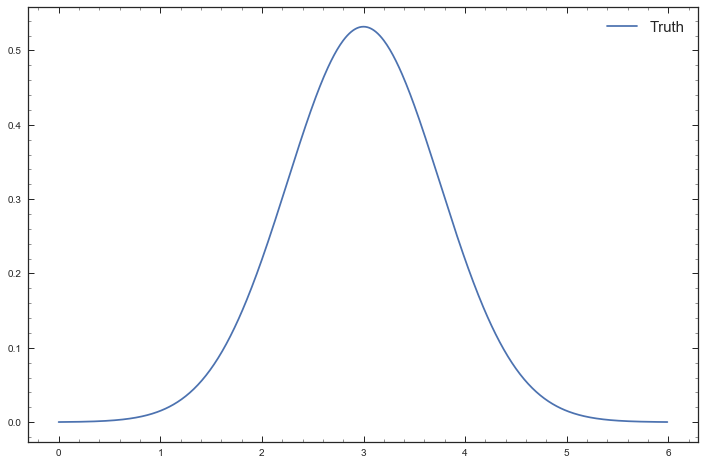

In [4]:
%matplotlib inline
plt.figure(figsize=[12,8])
plt.plot(x,gdist,label='Truth')
plt.legend(fontsize=15)

In [15]:
dist_grid= np.zeros([sp_size,x.size])
for i in range(sp_size):
    dist_grid[i] = Gauss_dist(x,np.random.normal(3,.75),np.random.choice(ers))

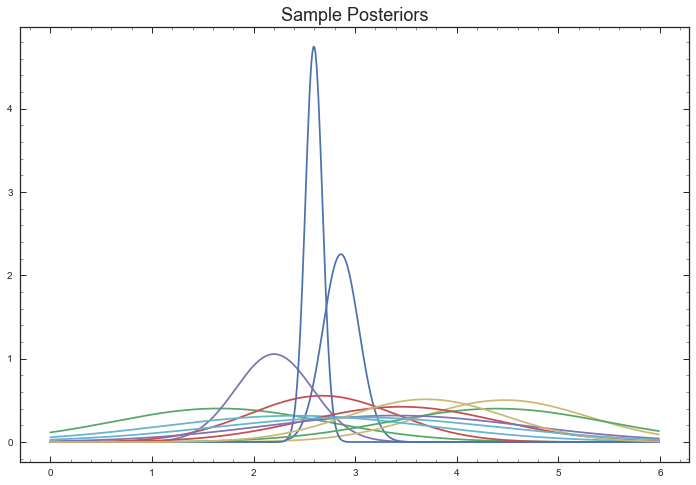

In [16]:
plt.figure(figsize=[12,8])
for i in range(sp_size):
    plt.plot(x,dist_grid[i])
plt.title('Sample Posteriors', fontsize =18)

In [17]:
Pos = Stack_posteriors(dist_grid,x)

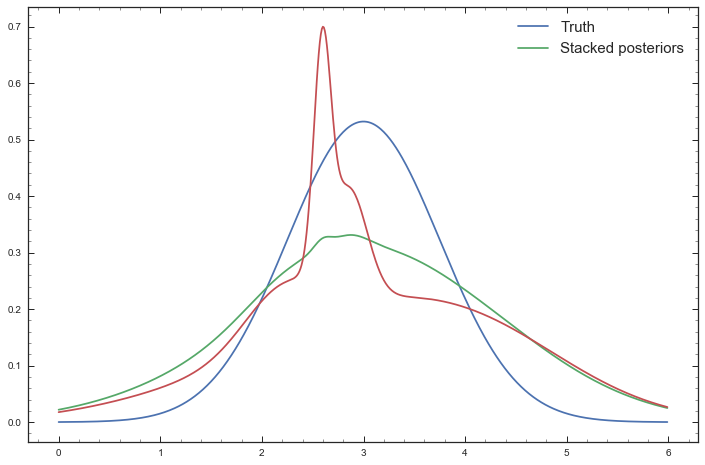

In [18]:
plt.figure(figsize=[12,8])
plt.plot(x,gdist,label = 'Truth')
plt.plot(x,Pos,label = 'Stacked posteriors')
plt.plot(x,sum(dist_grid)/np.trapz(sum(dist_grid),x))
plt.legend(fontsize = 15)


In [19]:
med,lfit,hfit = Bootstrap_errors_stack(dist_grid,x)

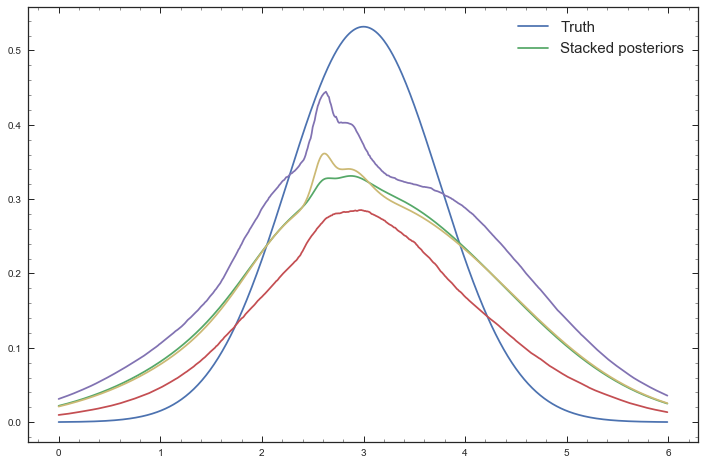

In [20]:
plt.figure(figsize=[12,8])
plt.plot(x,gdist,label = 'Truth')
plt.plot(x,Pos,label = 'Stacked posteriors')
plt.plot(x,med)
plt.plot(x,lfit)
plt.plot(x,hfit)
plt.legend(fontsize = 15)
